In [ ]:
!wget https://raw.githubusercontent.com/freeCodeCamp/boilerplate-page-view-time-series-visualizer/main/fcc-forum-pageviews.csv

--2025-11-26 12:36:19--  https://raw.githubusercontent.com/freeCodeCamp/boilerplate-page-view-time-series-visualizer/main/fcc-forum-pageviews.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22381 (22K) [text/plain]
Saving to: ‘fcc-forum-pageviews.csv’

fcc-forum-pageviews 100%[===================>]  21.86K  --.-KB/s    in 0.003s  

2025-11-26 12:36:20 (8.09 MB/s) - ‘fcc-forum-pageviews.csv’ saved [22381/22381]



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [6]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')
df = df[(df['value'] >= df['value'].quantile(0.025)) &
        (df['value'] <= df['value'].quantile(0.975))]

In [7]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


Text(0, 0.5, 'Page Views')

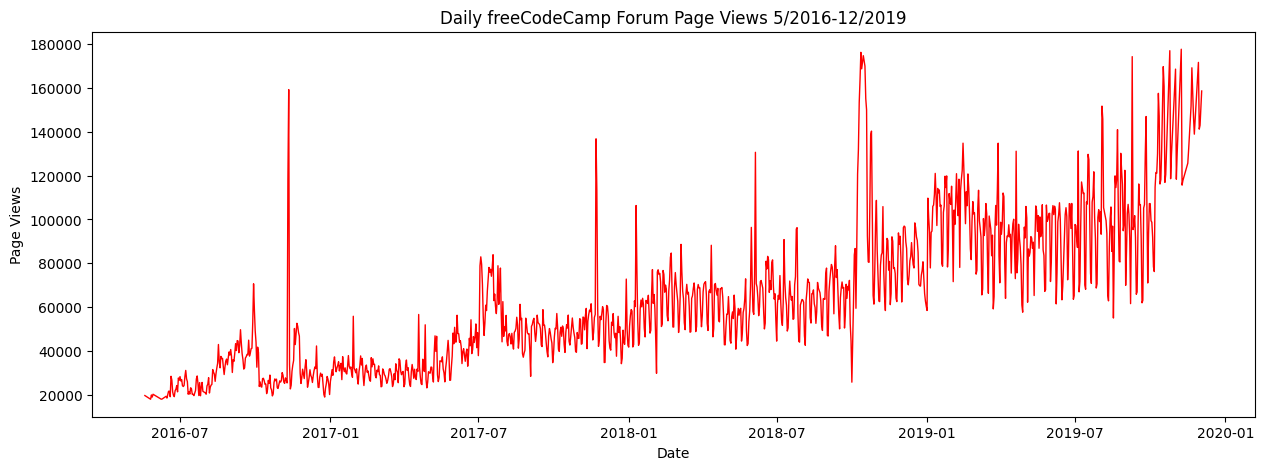

In [10]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(df.index, df['value'], color='red', linewidth=1)
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')

In [11]:
df_bar = df.copy()

In [12]:
df_bar['year'] = df_bar.index.year
df_bar['month'] = df_bar.index.month_name()

In [13]:
df_bar

,value,year,month
date,,,
2016-05-19,19736,2016,May
2016-05-26,18060,2016,May
2016-05-27,19997,2016,May
2016-05-28,19044,2016,May
2016-05-29,20325,2016,May
...,...,...,...
2019-11-24,138875,2019,November
2019-11-29,171584,2019,November
2019-11-30,141161,2019,November


In [14]:
df_bar = df_bar.groupby(['year', 'month'])['value'].mean().reset_index()

In [15]:
df_bar

,year,month,value
0,2016,August,31049.193548
1,2016,December,27832.419355
2,2016,July,24109.678571
3,2016,June,21875.105263
4,2016,May,19432.400000
5,2016,November,40448.633333
6,2016,October,27398.322581
7,2016,September,41476.866667
8,2017,April,30878.733333
9,2017,August,47712.451613


In [20]:
df_bar['month'] = pd.Categorical(df_bar['month'], categories=['January','February','March','April','May','June',
                'July','August','September','October','November','December'], ordered=True)

In [21]:
df_bar['month']

,month
0,August
1,December
2,July
3,June
4,May
5,November
6,October
7,September
8,April
9,August


In [22]:
df_pivot = df_bar.pivot(index='year', columns='month', values='value')

In [23]:
df_pivot

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


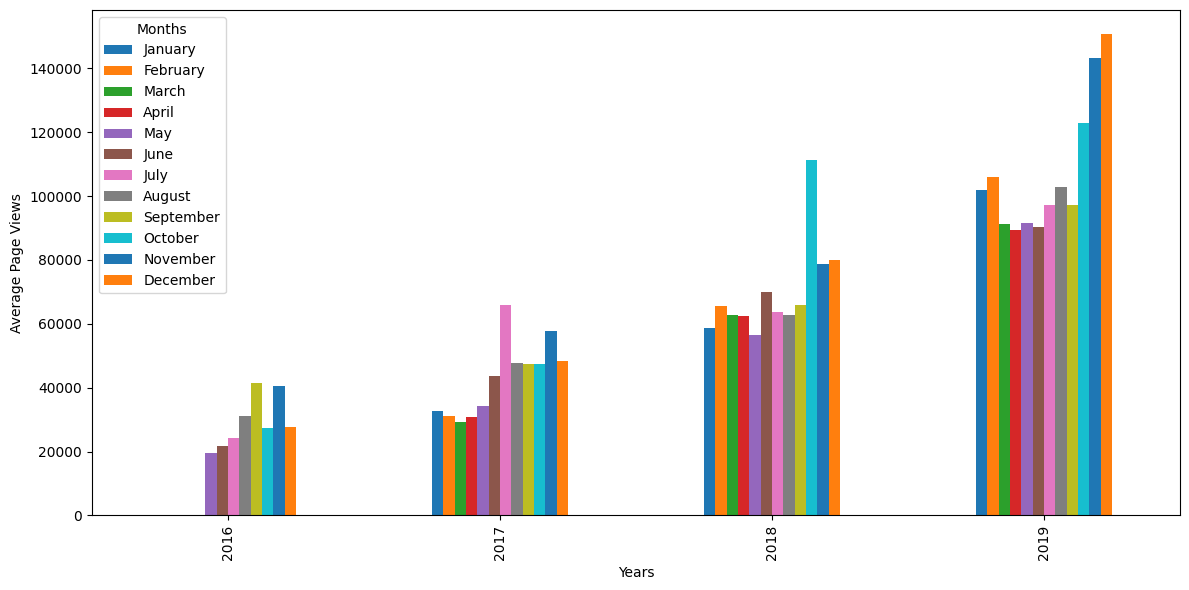

In [27]:
fig = df_pivot.plot(
    kind='bar',
    figsize=(12, 6),
    xlabel='Years',
    ylabel='Average Page Views'
).figure

plt.legend(title='Months')
plt.tight_layout()

In [28]:
df_box = df.copy()


In [30]:
df_box

,value,year
date,,
2016-05-19,19736,2016
2016-05-26,18060,2016
2016-05-27,19997,2016
2016-05-28,19044,2016
2016-05-29,20325,2016
...,...,...
2019-11-24,138875,2019
2019-11-29,171584,2019
2019-11-30,141161,2019


In [29]:
df_box['year'] = df_box.index.year

In [31]:
df_box['year']

,year
date,
2016-05-19,2016
2016-05-26,2016
2016-05-27,2016
2016-05-28,2016
2016-05-29,2016
...,...
2019-11-24,2019
2019-11-29,2019
2019-11-30,2019


In [32]:
df_box['month'] = df_box.index.strftime('%b')

In [33]:
df_box['month']

,month
date,
2016-05-19,May
2016-05-26,May
2016-05-27,May
2016-05-28,May
2016-05-29,May
...,...
2019-11-24,Nov
2019-11-29,Nov
2019-11-30,Nov


In [34]:
df_box['month_num'] = df_box.index.month

In [35]:
df_box = df_box.sort_values('month_num')

Text(0, 0.5, 'Page Views')

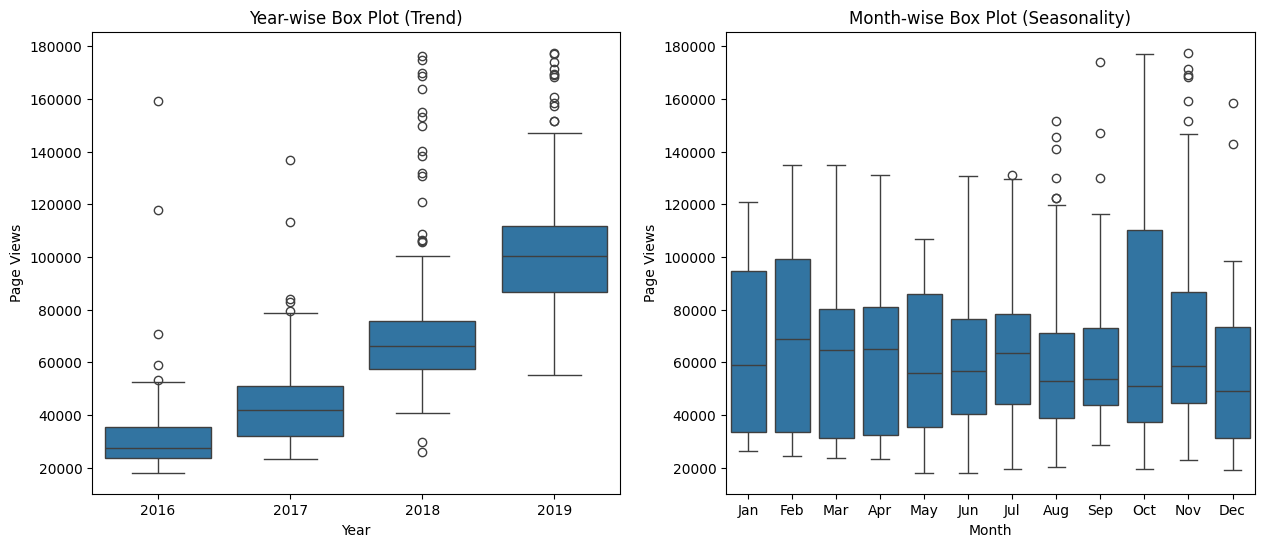

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
axes[0].set_title('Year-wise Box Plot (Trend)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')

sns.boxplot(
    x='month',
    y='value',
    data=df_box,
    ax=axes[1],
    order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
)
axes[1].set_title('Month-wise Box Plot (Seasonality)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Page Views')


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')
df = df[(df['value'] >= df['value'].quantile(0.025)) &
        (df['value'] <= df['value'].quantile(0.975))]


def draw_line_plot():
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(df.index, df['value'], color='red', linewidth=1)
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    fig.savefig('line_plot.png')
    return fig


def draw_bar_plot():
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month_name()
    df_bar = df_bar.groupby(['year', 'month'])['value'].mean().reset_index()
    df_bar['month'] = pd.Categorical(df_bar['month'],
                                     categories=['January','February','March','April','May','June',
                                                 'July','August','September','October','November','December'],
                                     ordered=True)
    df_pivot = df_bar.pivot(index='year', columns='month', values='value')

    fig = df_pivot.plot(kind='bar', figsize=(12, 6), xlabel='Years', ylabel='Average Page Views').figure
    plt.legend(title='Months')
    plt.tight_layout()
    fig.savefig('bar_plot.png')
    return fig


def draw_box_plot():
    df_box = df.copy()
    df_box['year'] = df_box.index.year
    df_box['month'] = df_box.index.strftime('%b')
    df_box['month_num'] = df_box.index.month
    df_box = df_box.sort_values('month_num')

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    sns.boxplot(x='month', y='value', data=df_box, ax=axes[1],
                order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    fig.savefig('box_plot.png')
    return fig


draw_line_plot()
draw_bar_plot()
draw_box_plot()